#### CNN example for the fashion items classification

In [52]:
### Libraries
import numpy as np
import pandas as pds
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [74]:
### Extracting the data
train_data = pds.read_csv('fashion-mnist_train.csv')
print(type(train_data))
train_data.head(n=10)

#Extracting the X and Y from it
data = train_data.values
X = data[:20000,1:]
X = X/255.0
Y = data[:20000,0]

print("The shape of the X is {}".format(X.shape))
print("The shape of the Y is {}".format(Y.shape))

<class 'pandas.core.frame.DataFrame'>
The shape of the X is (20000, 784)
The shape of the Y is (20000,)


In [75]:
### Preparing the data for the traing
Y_ = to_categorical(Y)
X_ = X.reshape((-1,28,28,1))
print(Y_.shape,X_.shape)

(20000, 10) (20000, 28, 28, 1)


In [77]:
### Dividing the data into train and test
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_,Y_,test_size = 0.2)

print("The shape of the X_Train is {}".format(X_Train.shape))
print("The shape of the Y_Train is {}".format(Y_Train.shape))
print("The shape of the X_Test is {}".format(X_Test.shape))
print("The shape of the Y_Test is {}".format(Y_Test.shape))

The shape of the X_Train is (16000, 28, 28, 1)
The shape of the Y_Train is (16000, 10)
The shape of the X_Test is (4000, 28, 28, 1)
The shape of the Y_Test is (4000, 10)


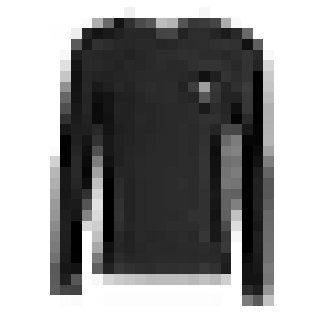

In [78]:
### Visulizing the data
import matplotlib.pyplot as plt
plt.style.use("seaborn")

def display(img):
    img_reshaped = img.reshape((28,28))
    plt.imshow(img_reshaped)
    plt.axis("off")
    plt.show()

display(X_Train[0])

In [79]:
### Model building
model = Sequential(name = 'fashion_data')
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "fashion_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [80]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(X_Train,Y_Train,epochs=20,validation_split=0.1,batch_size=128)

Train on 14400 samples, validate on 1600 samples
Epoch 1/20
14400/14400 [==============================] - 11s 773us/step - loss: 1.0195 - accuracy: 0.6503 - val_loss: 0.6683 - val_accuracy: 0.7425
Epoch 2/20
14400/14400 [==============================] - 12s 827us/step - loss: 0.5942 - accuracy: 0.7767 - val_loss: 0.5367 - val_accuracy: 0.7862
Epoch 3/20
14400/14400 [==============================] - 9s 642us/step - loss: 0.5037 - accuracy: 0.8087 - val_loss: 0.4918 - val_accuracy: 0.8169
Epoch 4/20
14400/14400 [==============================] - 9s 629us/step - loss: 0.4676 - accuracy: 0.8262 - val_loss: 0.4342 - val_accuracy: 0.8281
Epoch 5/20
14400/14400 [==============================] - 11s 759us/step - loss: 0.4210 - accuracy: 0.8445 - val_loss: 0.4189 - val_accuracy: 0.8406
Epoch 6/20
14400/14400 [==============================] - 11s 780us/step - loss: 0.3899 - accuracy: 0.8551 - val_loss: 0.3789 - val_accuracy: 0.8575
Epoch 7/20
14400/14400 [==============================] - 1

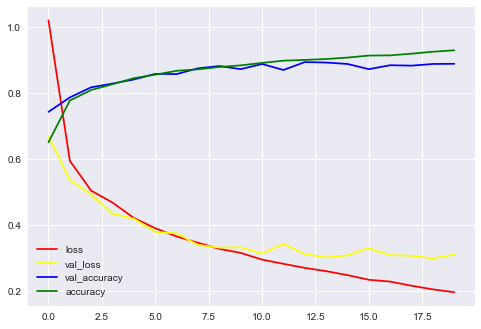

In [81]:
plt.plot(hist.history['loss'],color='red',label="loss")
plt.plot(hist.history['val_loss'],color='yellow',label="val_loss")
plt.plot(hist.history['val_accuracy'],color='blue',label="val_accuracy")
plt.plot(hist.history['accuracy'],color='green',label="accuracy")
plt.legend()
plt.show()

In [82]:
model.evaluate(X_Test,Y_Test)

4000/4000 [==============================] - 1s 223us/step


[0.341614795088768, 0.8827499747276306]